<a href="https://colab.research.google.com/github/CaesarQuintero/MyWeb/blob/main/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression ML Project Lynxus

## Create Virtual Environment

In [45]:
!pip3 install virtualenv
!python3 -m virtualenv env

created virtual environment CPython3.10.12.final.0-64 in 7751ms
  creator CPython3Posix(dest=/content/drive/My Drive/Lynxus/env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.2.1, setuptools==68.2.2, wheel==0.41.2
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


## Activate Virtual Environment

In [51]:
!source env/bin/activate

## Install Depencies on the Virtual Environment

In [52]:
!pip3 install numpy pandas matplotlib scikit-learn seaborn google.colab

## Import of dependencies

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Dataset source | File route

In [54]:
#Drive mount
if not os.path.ismount('/content/drive'):
  drive.mount('/content/drive')

else:
 pass

#File variables
file_route = '/content/drive/MyDrive/Lynxus/'
file_name = "MLDATASET testing for model.csv"
os.chdir(file_route)

#### Check the route in cloud linux server

In [55]:
!pwd

/content/drive/MyDrive/Lynxus


#### Check a correct mount of drive

In [56]:
!head "MLDATASET testing for model.csv"

﻿carrierid,FreightWeight(lb),IsContract,Route length (miles),ModeType,freightType,TrailerType,CustomerID,Broker Rep,Customer Rep,BrokeredTime,Pickup Appointment End Time,Pickup Arrival Time,Pickup Late Time (in Mins),Delivery Appointment End Time,Delivery Arrival Time,Delivery Late Time (in Mins),Delivery Late Time (in Hours),OriginCity,OriginState,OriginZip,DestinationCity,DestinationState,DestinationZip,CarrierCharges,CustomerCharges,Late Delivery
40052,30000,TRUE,22.4,Truckload,Dry,Dry Van,10005,CERAZ,HOUSE,7/14/2021 10:07,44386.58333,44386.63819,79,44386.79167,44387.30417,738,12.3,Indianapolis,IN,46204,Fishers,IN,46040,0,0,TRUE
62847,30000,FALSE,579,Truckload,Dry,Dry Van,16158,DDRAV,,3/12/2021 14:46,44268.5,44268.41667,-120,44270,44270.33333,480,8,Fort Wayne,IN,46804,Maple Grove,MN,55369,2000,2400,TRUE
49004,186,FALSE,,LTL,Dry,Dry Van,16158,LATHAM,,1/7/2021 16:18,44019,44204,266400,44019,44204,266400,4440,Suwanee,GA,30024,Bethlehem,PA,18015,0,0,TRUE
38888,21600,FALSE,200,Power Only

## Dataload and EDA

In [57]:
# Pick Desired Columns for the model
desired_columns = ['FreightWeight(lb)','Route length (miles)','freightType','TrailerType','Broker Rep','Customer Rep','FreightWeight(lb)','BrokeredTime','Delivery Appointment End Time','Delivery Arrival Time','BrokeredTime','Delivery Late Time (in Mins)','OriginCity','OriginState','OriginZip','DestinationCity','DestinationState','DestinationZip','CarrierCharges','CustomerCharges']

In [66]:
#Import dataset
data = pd.read_csv(file_name,usecols =desired_columns)

In [59]:
# Data resume
#Includes, mean, std, min, max and data types
print(f'{data.describe()}\n\n{data.dtypes}n\n')

       FreightWeight(lb)  Route length (miles)  Delivery Appointment End Time  \
count      180435.000000          1.620120e+05                  180435.000000   
mean        26374.434145          8.439435e+02                   44677.430024   
std         15098.512693          8.543441e+04                     311.112221   
min             0.000000          0.000000e+00                   34459.270830   
25%         12723.000000          2.580000e+02                   44397.218750   
50%         30000.000000          4.840000e+02                   44671.458330   
75%         40000.000000          8.040000e+02                   44951.250000   
max        440000.000000          3.437578e+07                   49804.500000   

       Delivery Arrival Time  Delivery Late Time (in Mins)  CarrierCharges  \
count          180417.000000                  1.804170e+05   180435.000000   
mean            44677.490911                  1.161795e+02     1685.400147   
std               308.299984        

### Checking Columns Dataset


In [77]:
data.tail()

,FreightWeight(lb),Route length (miles),freightType,TrailerType,Broker Rep,Customer Rep,BrokeredTime,Delivery Appointment End Time,Delivery Arrival Time,Delivery Late Time (in Mins),OriginCity,OriginState,OriginZip,DestinationCity,DestinationState,DestinationZip,CarrierCharges,CustomerCharges
180430,42000,110.0,Dry,Dry Van,BFERG,MSMAL,10/4/2023 10:23,45204.66667,45204.33333,-480.0,Lima,OH,45804,Columbus,OH,43217,700.0,1116.80
180431,38804,188.0,Hazardous,Reefer,BFERG,MSMAL,10/5/2023 8:34,45204.00000,45204.25000,360.0,Greenville,OH,45331,Wyandotte,MI,48192,1800.0,1875.00
180432,1500,0.0,Dry,Dry Van,TARMS,GHARR,10/4/2023 12:10,45204.68750,45203.41875,-1827.0,Novi,MI,48377,Novi,MI,48376,200.0,200.00
180433,10000,328.1,Dry,Dry Van,SSIMO,BSTEP,10/4/2023 12:36,45204.12500,45203.91230,-307.0,Bolingbrook,IL,60440,Springfield,OH,45502,1000.0,1145.00
180434,10927,537.0,Dry,Dry Van,LMUNO,GHARR,10/4/2023 14:32,45204.54167,45204.16907,-537.0,Lakewood,WA,98499,Kalispell,MT,59901,2000.0,3798.68


In [ ]:
data.head()

,FreightWeight(lb),Route length (miles),freightType,TrailerType,Broker Rep,Customer Rep,BrokeredTime,Delivery Appointment End Time,Delivery Arrival Time,Delivery Late Time (in Mins),OriginCity,OriginState,OriginZip,DestinationCity,DestinationState,DestinationZip,CarrierCharges,CustomerCharges
0,30000,22.4,Dry,Dry Van,CERAZ,HOUSE,7/14/2021 10:07,44386.79167,44387.30417,738.0,Indianapolis,IN,46204,Fishers,IN,46040,0.0,0.0
1,30000,579.0,Dry,Dry Van,DDRAV,NaN,3/12/2021 14:46,44270.00000,44270.33333,480.0,Fort Wayne,IN,46804,Maple Grove,MN,55369,2000.0,2400.0
2,186,NaN,Dry,Dry Van,LATHAM,NaN,1/7/2021 16:18,44019.00000,44204.00000,266400.0,Suwanee,GA,30024,Bethlehem,PA,18015,0.0,0.0
3,21600,200.0,Dry,Dry Van,RREES,GHARR,1/14/2021 9:18,44210.99931,44210.91667,-119.0,Indianapolis,IN,46214,Minooka,IL,60447,700.0,1050.0
4,30000,305.0,Dry,Dry Van,APEND,NaN,1/21/2021 15:03,44221.58333,44221.41667,-240.0,Ajax,ON,L1S,Chateauguay,QC,J6J,600.0,800.0


### Check for null values

In [61]:
#Null values
if data.isnull().values.any():
  print('The Dataset has null values')
else:
  'The dataset has not null values'

The Dataset has null values


In [62]:
# Porcentage of null values
data.isna().mean()*100

FreightWeight(lb)                 0.000000
Route length (miles)             10.210325
freightType                       0.000000
TrailerType                       0.000000
Broker Rep                        0.000000
Customer Rep                     11.203480
BrokeredTime                      0.000000
Delivery Appointment End Time     0.000000
Delivery Arrival Time             0.009976
Delivery Late Time (in Mins)      0.009976
OriginCity                        0.000000
OriginState                       0.000000
OriginZip                         0.001108
DestinationCity                   0.000000
DestinationState                  0.000000
DestinationZip                    0.003880
CarrierCharges                    0.000000
CustomerCharges                   0.000000
dtype: float64

### Data Procesing | Statistical Normalization

---



---



Aim for remove the null values to increase the relationships in the correlation matrix before to setting up the Linear regression machine learning model

In [ ]:
#For value less than 1% of significance
#Pending to code

### Variable distribution and correlation matrix

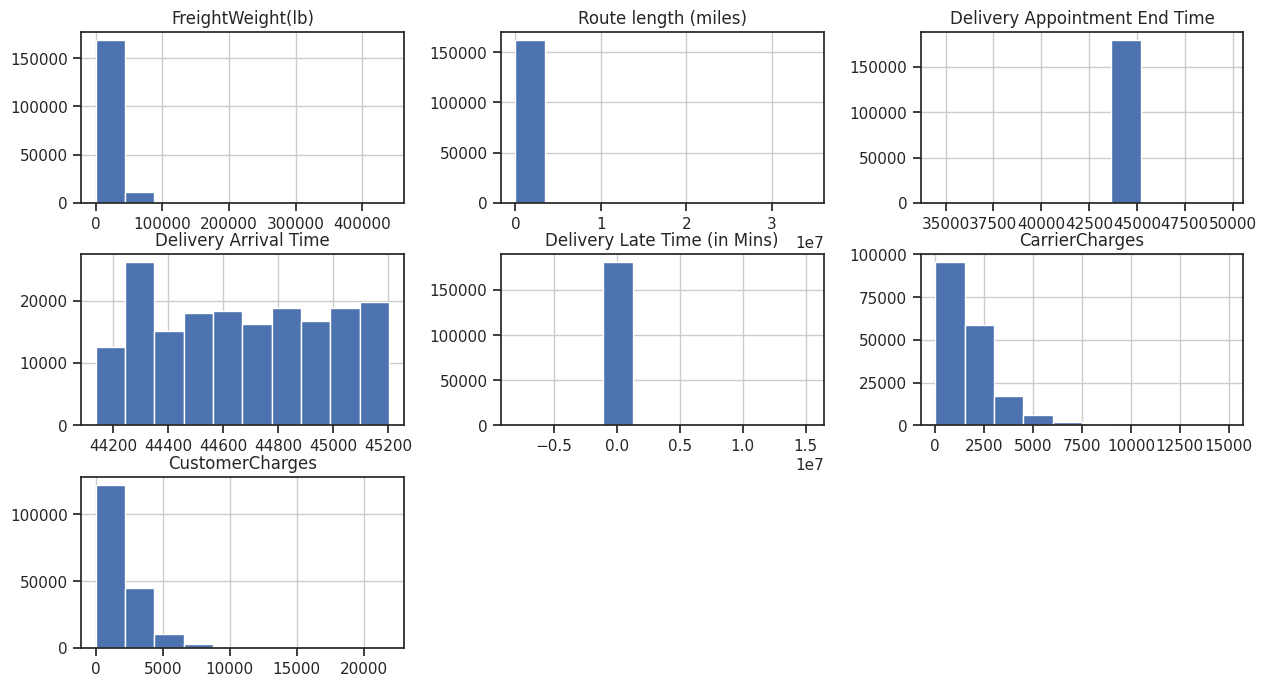

In [73]:
# Variable distribution
data.hist(figsize=(15,8))
plt.show()

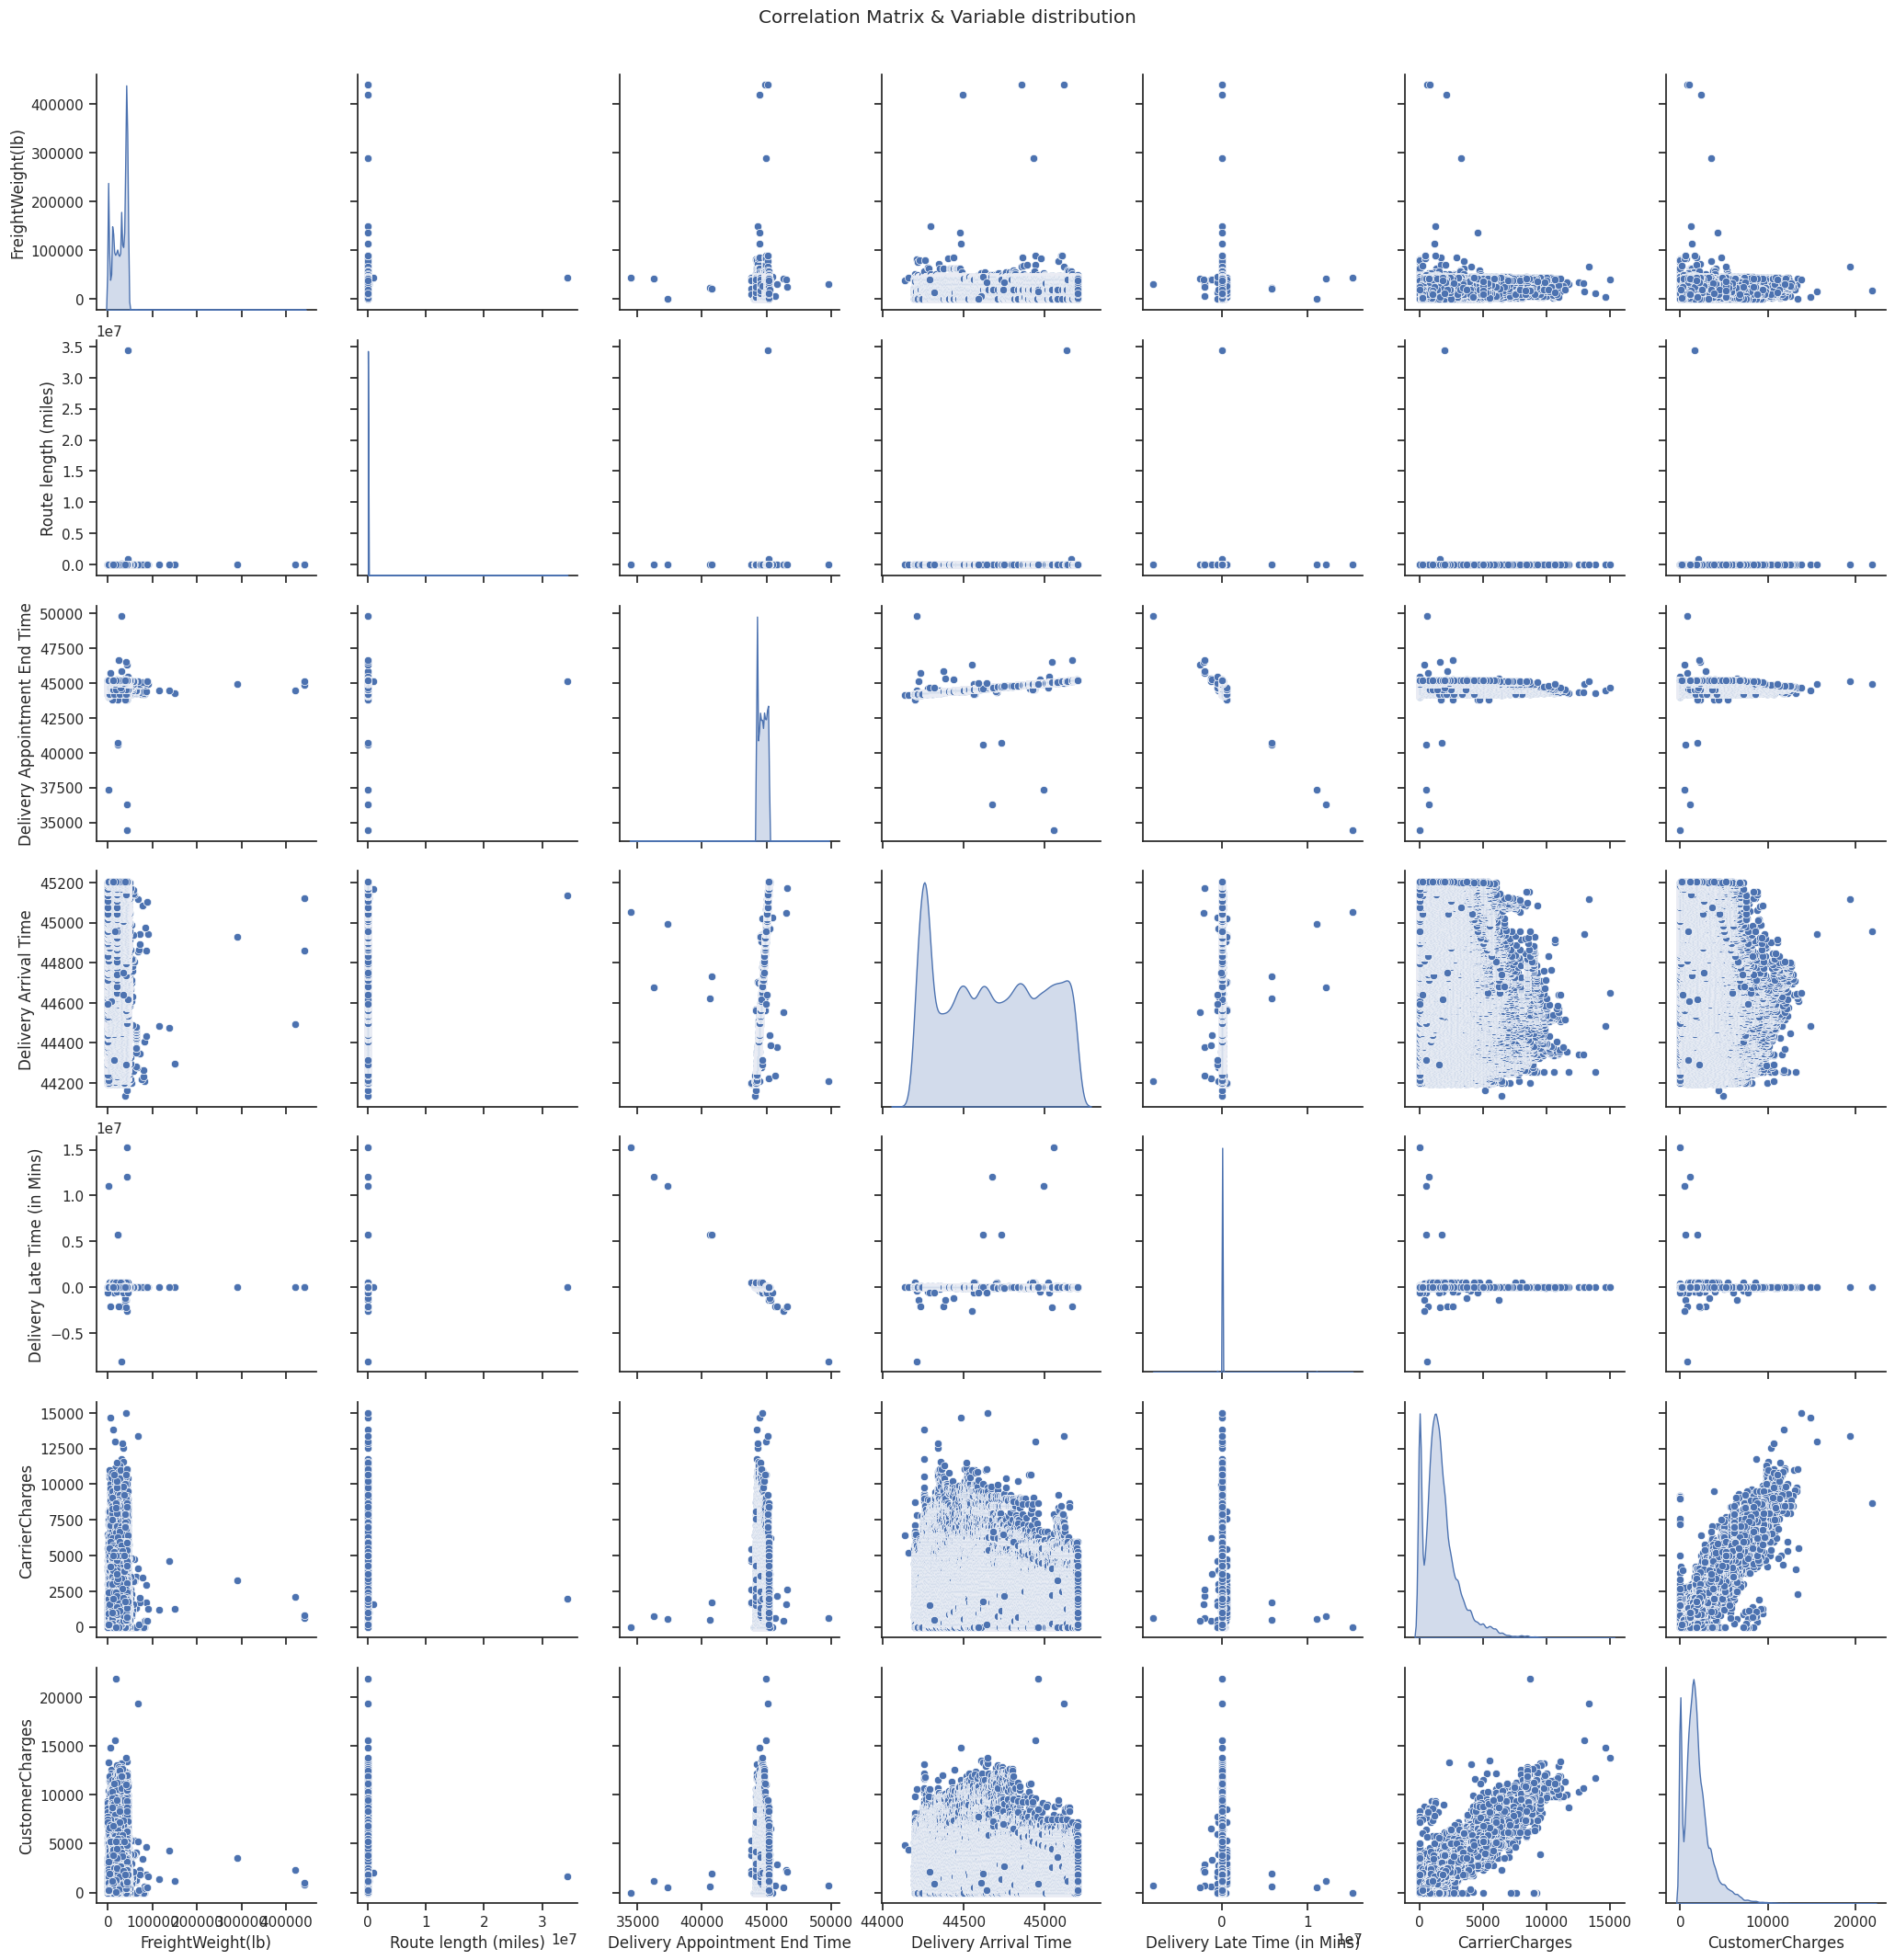

In [80]:
sns.set(style='ticks')
sns.pairplot(data, diag_kind='kde', markers='o', height=3, aspect=1)
plt.suptitle('Correlation Matrix & Variable distribution', y=1.02)
plt.show()

<ipython-input-68-bdd77821a50a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


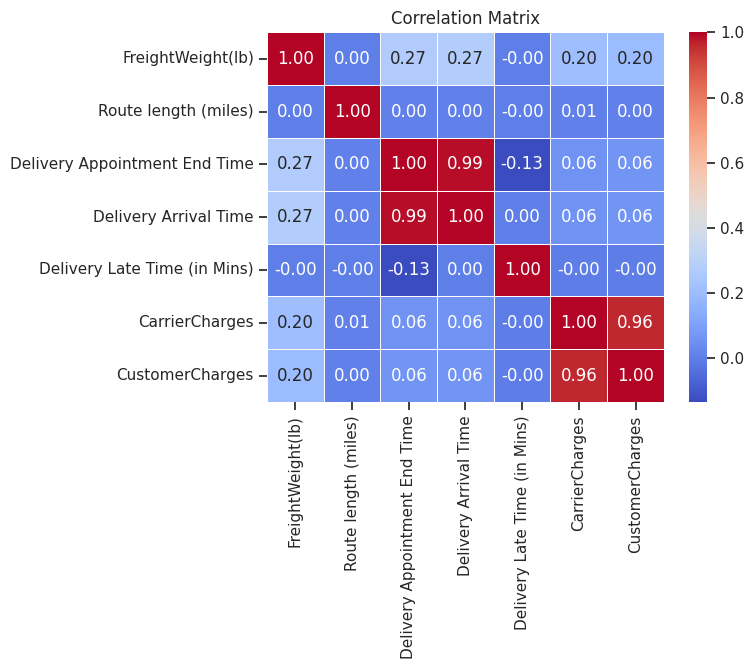

In [68]:
# Variable correlation
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Atipical Values
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    iqr = Q3 - Q1
    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print("Número de outliers en la variable", col, len(outliers))

Número de outliers en la variable FreightWeight(lb) 15
Número de outliers en la variable Route length (miles) 10995


TypeError: ignored